In [15]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import os
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix

#load data
dataset = 1
match dataset:
    case 1:
        test = 'fashion-mnist_test.csv'
        train = 'fashion-mnist_train.csv'
    case 2: 
        test = "mnist_test.csv"
        train = "mnist_train.csv"
testdata = pnd.read_csv(test)
traindata = pnd.read_csv(train)

#split into images and labels
testdata_pixel = testdata.drop(testdata.columns[0], axis=1).to_numpy()
traindata_pixel = traindata.drop(traindata.columns[0], axis=1).to_numpy()
label_train = traindata[traindata.columns[0]].to_numpy()
label_test = testdata[testdata.columns[0]].to_numpy()

#reshape for cnn
cnn_test = testdata_pixel.reshape(-1,28,28) /255.0
cnn_train = traindata_pixel.reshape(-1,28,28) /255.0
cnn_test = np.expand_dims(cnn_test,axis=3)
cnn_train = np.expand_dims(cnn_train,axis=3)
cnn_label_test = tf.keras.utils.to_categorical(label_test)
cnn_label_train = tf.keras.utils.to_categorical(label_train)

softmax_nodes = 10
class_names = np.array(["T-shirt / Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"])

#summarize the classes 0 and 6
summarize_shirt = False
if summarize_shirt == True:
    label_test[label_test==6]=0
    label_test[label_test>=7]-=1
    label_train[label_train==6]=0
    label_train[label_train>=7]-=1
    cnn_label_test = tf.keras.utils.to_categorical(label_test)
    cnn_label_train = tf.keras.utils.to_categorical(label_train)
    softmax_nodes -= 1
    class_names = np.delete(class_names,6)

We have now loaded and reshaped the data. The labels were converted into 10-dimensional to be compatible with the output of the softmax activation function and the dimension of the images was increased by one to show that there is only one color channel. 

In [2]:
lenet5_model = Sequential([
  Conv2D(6, 5, input_shape=(28, 28, 1), activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  Conv2D(16, 5, activation="relu",padding="valid"),
  MaxPooling2D(pool_size=2,strides=2),
  Conv2D(120, 5, activation="relu",padding="valid"),
  Flatten(),
  Dense(84,activation="relu"),
  Dense(softmax_nodes, activation='softmax'),
])
lenet5_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
lenet5_model.fit(
  cnn_train,
  cnn_label_train,
  epochs=20,
  validation_data=(cnn_test, cnn_label_test)
)

Epoch 1/20
1875/1875 [==============================] - 46s 23ms/step - loss: 0.5508 - accuracy: 0.7966 - val_loss: 0.3896 - val_accuracy: 0.8596
Epoch 2/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3597 - accuracy: 0.8686 - val_loss: 0.3471 - val_accuracy: 0.8692
Epoch 3/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3151 - accuracy: 0.8843 - val_loss: 0.3063 - val_accuracy: 0.8897
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2837 - accuracy: 0.8944 - val_loss: 0.2893 - val_accuracy: 0.8935
Epoch 5/20
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2623 - accuracy: 0.9036 - val_loss: 0.2856 - val_accuracy: 0.8914
Epoch 6/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2454 - accuracy: 0.9080 - val_loss: 0.2702 - val_accuracy: 0.8978
Epoch 7/20
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2288 - accuracy: 0.9139 - val_loss: 0.2627 -

In [6]:
lenet5_model.evaluate(cnn_test,cnn_label_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3240 - accuracy: 0.9085


[0.3240226209163666, 0.9085000157356262]

The previous code used a modifyed LeNet-5 architecture with max pooling instead of mean pooling and ReLU activation

In [7]:
vgg_model = Sequential([
  Conv2D(32, 3, input_shape=(28, 28, 1), activation="relu",padding="same"),
  Conv2D(32, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Flatten(),
  Dense(256,activation="relu"),
  Dropout(0.15),
  Dense(256,activation="relu"),
  Dropout(0.15),
  Dense(softmax_nodes, activation='softmax'),
])
vgg_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
vgg_model.fit(
  cnn_train,
  cnn_label_train,
  epochs=20,
  validation_data=(cnn_test, cnn_label_test),
  batch_size=128
)

Epoch 1/20
469/469 [==============================] - 82s 167ms/step - loss: 0.5797 - accuracy: 0.7845 - val_loss: 0.6758 - val_accuracy: 0.7476
Epoch 2/20
469/469 [==============================] - 137s 292ms/step - loss: 0.3626 - accuracy: 0.8670 - val_loss: 0.3314 - val_accuracy: 0.8734
Epoch 3/20
469/469 [==============================] - 147s 313ms/step - loss: 0.3150 - accuracy: 0.8846 - val_loss: 0.3066 - val_accuracy: 0.8848
Epoch 4/20
469/469 [==============================] - 121s 257ms/step - loss: 0.2808 - accuracy: 0.8974 - val_loss: 0.2882 - val_accuracy: 0.8911
Epoch 5/20
469/469 [==============================] - 131s 279ms/step - loss: 0.2594 - accuracy: 0.9050 - val_loss: 0.2667 - val_accuracy: 0.9003
Epoch 6/20
469/469 [==============================] - 152s 323ms/step - loss: 0.2501 - accuracy: 0.9094 - val_loss: 0.2991 - val_accuracy: 0.8926
Epoch 7/20
469/469 [==============================] - 152s 324ms/step - loss: 0.2353 - accuracy: 0.9140 - val_loss: 0.2592 - 

In [6]:
complex_model = Sequential([
  Conv2D(16, 5, input_shape=(28, 28, 1), activation="relu",padding="same"),
  Conv2D(16, 5, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(32, 3, activation="relu",padding="same"),
  Conv2D(32, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Flatten(),
  Dense(256,activation="relu"),
  Dropout(0.15),
  Dense(512,activation="relu"),
  Dropout(0.15),
  Dense(softmax_nodes, activation='softmax'),
])
complex_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.01,
    patience=2,
    verbose=0,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=0
)
history = complex_model.fit(
  cnn_train,
  cnn_label_train,
  epochs = 20,
  validation_data=(cnn_test, cnn_label_test),
  batch_size=256
)

Epoch 1/20
235/235 [==============================] - 82s 340ms/step - loss: 0.4745 - accuracy: 0.8260 - val_loss: 1.8456 - val_accuracy: 0.3392
Epoch 2/20
235/235 [==============================] - 105s 450ms/step - loss: 0.3103 - accuracy: 0.8859 - val_loss: 0.5106 - val_accuracy: 0.8171
Epoch 3/20
235/235 [==============================] - 82s 348ms/step - loss: 0.2589 - accuracy: 0.9051 - val_loss: 0.3353 - val_accuracy: 0.8730
Epoch 4/20
235/235 [==============================] - 83s 352ms/step - loss: 0.2375 - accuracy: 0.9128 - val_loss: 0.2917 - val_accuracy: 0.8947
Epoch 5/20
235/235 [==============================] - 120s 511ms/step - loss: 0.2088 - accuracy: 0.9242 - val_loss: 0.2933 - val_accuracy: 0.8991
Epoch 6/20
235/235 [==============================] - 82s 349ms/step - loss: 0.1932 - accuracy: 0.9287 - val_loss: 0.2621 - val_accuracy: 0.9061
Epoch 7/20
235/235 [==============================] - 81s 346ms/step - loss: 0.1809 - accuracy: 0.9334 - val_loss: 0.2627 - val_

In [10]:
model=complex_model
model.save('Results/complex_model')
tf.keras.models.load_model('Results/complex_model').
y_pred = model.predict(cnn_test)
y_pred = np.argmax(y_pred,axis=1)
conf = sklearn.metrics.confusion_matrix(y_pred, label_test)
conf_df = pnd.DataFrame(conf, index=class_names, columns=class_names)
conf_df = round(conf_df*100 / conf_df.sum(axis=1),2)
print(conf_df)

SyntaxError: invalid syntax (3086227987.py, line 2)

313/313 [==============================] - 4s 12ms/step
               T-shirt / Top  Trouser  Pullover  Dress   Coat  Sandal  Shirt   
T-shirt / Top          83.24      0.2      1.34   4.63   0.18    0.00  13.00  \
Trouser                 0.09     99.2      0.00   0.55   0.00    0.11   0.00   
Pullover                2.65      0.1     86.22   0.88   2.82    0.00   8.30   
Dress                   0.66      0.3      0.86  95.26   0.64    0.00   1.68   
Coat                    0.38      0.0      4.50   5.29  83.97    0.00   8.18   
Sandal                  0.00      0.0      0.00   0.00   0.00  100.00   0.00   
Shirt                   7.01      0.2      2.78   3.30   3.28    0.11  80.49   
Sneaker                 0.09      0.0      0.00   0.00   0.00    4.11   0.00   
Bag                     0.57      0.0      0.00   0.11   0.18    0.21   0.45   
Ankle Boot              0.00      0.0      0.00   0.11   0.00    0.95   0.00   

               Sneaker   Bag  Ankle Boot  
T-shirt / Top     0.

<AxesSubplot:>

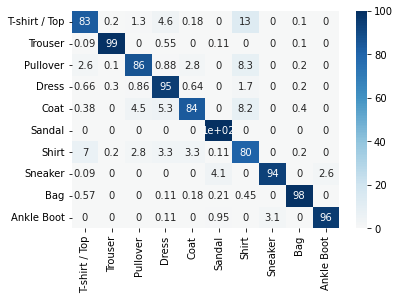

In [17]:
model = tf.keras.models.load_model('Results/complex_model')
y_pred = model.predict(cnn_test)
y_pred = np.argmax(y_pred,axis=1)
conf = sklearn.metrics.confusion_matrix(y_pred, label_test)
conf_df = pnd.DataFrame(conf, index=class_names, columns=class_names)
conf_df = round(conf_df*100 / conf_df.sum(axis=1),2)
print(conf_df)
sns.heatmap(conf_df, annot=True, cmap='RdBu', center=0)

               T-shirt / Top    Trouser  Pullover     Dress      Coat   
T-shirt / Top      -6.110569   1.282159  0.142159 -3.147841  1.302159  \
Trouser             1.354055  12.146495  1.444055  0.894055  1.444055   
Pullover           -1.189780   1.360220 -1.808017  0.580220 -1.359780   
Dress               0.777560   1.137560  0.577560  8.598040  0.797560   
Coat                1.102592   1.482592 -3.017408 -3.807408 -5.406672   
Sandal              1.443333   1.443333  1.443333  1.443333  1.443333   
Shirt              -5.604626   1.205374 -1.374626 -1.894626 -1.874626   
Sneaker             1.358818   1.448818  1.448818  1.448818  1.448818   
Bag                 0.873622   1.443622  1.443622  1.333622  1.263622   
Ankle Boot          1.443622   1.443622  1.443622  1.333622  1.443622   

                  Sandal      Shirt   Sneaker        Bag  Ankle Boot  
T-shirt / Top   1.482159 -11.517841  1.482159   1.382159    1.482159  
Trouser         1.334055   1.444055  1.444055   1.3440

<AxesSubplot:>

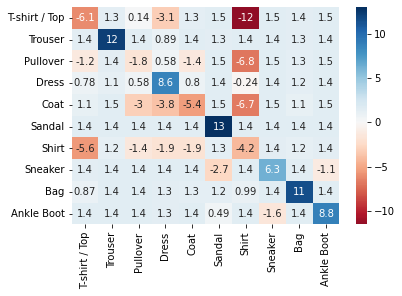

In [22]:
y_pred = pnd.read_csv("C:/Users/awark/Bioinfo Projekt/Results/95var.csv").iloc[:,2]
rowsums = conf_df.sum(axis=1)
acc = np.sum(y_pred == label_test)/ len(label_test)
for i in range(10):
    for j in range(10):
        if i != j:
            conf_df.values[i,j] -= (1-acc)*rowsums[i]/9
            conf_df.values[i,j] *= -1
        else: 
            conf_df.values[i,j] -= acc*rowsums[i]
print(conf_df)

sns.heatmap(conf_df, annot=True, cmap='RdBu', center=0,)